# 🕵️‍♂️ The Story of the 'Black Sheep': A Layman's Guide to Anomaly Detection

Hello there! I'm your **Machine Learning Guide**. Today, we're going on a journey to understand one of the most fascinating concepts in AI: **Anomaly Detection**.

Imagine you are a shepherd watching over 100 white sheep. Suddenly, you see one **black sheep** hopping around. That black sheep is an **Anomaly** (or an outlier). It's something that doesn't fit the usual pattern.

In this notebook, we'll learn how computers find these 'black sheep' in heaps of data.

## 🌟 Real-Life Examples (The 'Wait, That's Weird!' Moments)

We encounter anomaly detection every single day without realizing it:

1.  **💳 Credit Card Fraud**: You usually buy groceries at the local store. Suddenly, there's a $5,000 purchase for a diamond ring in another country. Your bank's AI says: *"Wait, that's weird!"* and blocks it.
2.  **🏥 Health Monitoring**: Your smartwatch tracks your heartbeat. If it suddenly goes from 70 bpm to 150 bpm while you're sitting still, it alerts you of an irregularity.
3.  **💡 Smart Home**: If your electricity usage spikes at 3 AM when everyone is asleep, your smart home system might detect a leak or a device left on.

## 🧠 The Core Concept: 'The Border Control'

The core idea is simple: **Define what is "Normal" first.**

Once the computer knows what a typical day looks like (the 'Normal' zone), it can easily spot anything that falls outside that zone. It's like a border control officer who knows which passports are standard and which ones look suspicious.

### Techniques to find the 'Black Sheep':

*   **📏 Z-Score (The Distance Rule)**: Measuring how far someone is standing from the center of the crowd. If they are too far, they are an anomaly.
*   **🌳 Isolation Forest (The Shortcut Rule)**: If I ask you to describe a normal person, it takes many details. But to describe a person with a 10-foot tall hat, you just say "the guy with the giant hat." Anomalies are **easy to isolate** or single out.
*   **📍 Local Outlier Factor (The Neighborhood Rule)**: If you live in a crowded city and suddenly there's a house 5 miles away from everyone else, that's an anomaly.

## 🛠️ Hands-on: Let's Find the Outliers!

Let's create a simple scenario: **Daily Step Count.**
Usually, you walk between 4,000 and 6,000 steps. But some days, you were either sick (0 steps) or ran a marathon (40,000 steps)!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Create a dataset of 100 days of walking
np.random.seed(42)
normal_days = np.random.normal(5000, 500, 95) # Most days are around 5000 steps
anomalous_days = np.array([100, 200, 15000, 20000, 40000]) # The 'weird' days

all_days = np.concatenate([normal_days, anomalous_days]).reshape(-1, 1)
df = pd.DataFrame(all_days, columns=['Steps'])

### 🤖 Training our 'Anomaly Hunter'
We will use the **Isolation Forest** technique. Think of it as an investigator that tries to isolate each data point. The fewer steps it takes to isolate a point, the more likely it is an anomaly!

In [2]:
# 2. Initialize the Anomaly Hunter
model = IsolationForest(contamination=0.05) # We expect about 5% anomalies

# 3. Find them!
df['Anomaly_Score'] = model.fit_predict(df[['Steps']])

# Map the results to readable labels
# -1 means Anomaly, 1 means Normal
df['Status'] = df['Anomaly_Score'].map({1: 'Normal', -1: 'Anomaly'})

### 📊 Visualization: Seeing the 'Black Sheep'
Let's plot our data. The red dots will be our detected anomalies.

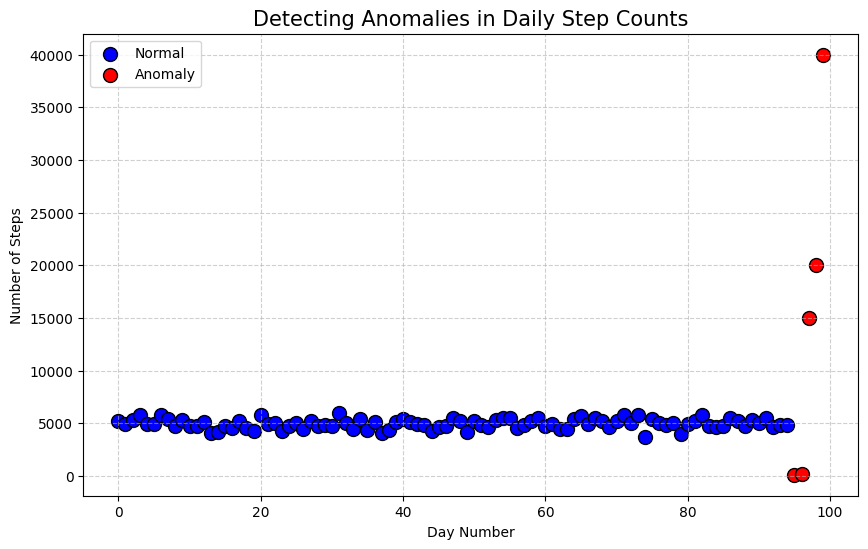

In [3]:
plt.figure(figsize=(10, 6))
colors = {'Normal': 'blue', 'Anomaly': 'red'}

for status in ['Normal', 'Anomaly']:
    subset = df[df['Status'] == status]
    plt.scatter(subset.index, subset['Steps'], c=colors[status], label=status, edgecolors='k', s=100)

plt.title("Detecting Anomalies in Daily Step Counts", fontsize=15)
plt.xlabel("Day Number")
plt.ylabel("Number of Steps")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 📝 Conclusion

Anomaly detection is like having a super-powered magnifying glass that ignores the common stuff and only highlights the interesting (or dangerous) bits. Whether it's saving you from fraud or helping a doctor diagnose a patient faster, it's a silent hero in our modern world.

---

### 👨‍🏫 About the Author

| **Detail** | **Information** |
| :--- | :--- |
| **Author Name** | **Tassawar Abbas** |
| **Email** | [abbas829@gmail.com](mailto:abbas829@gmail.com) |
| **Role** | Data Science & ML Enthusiast |

*Happy Learning! Hope you enjoyed the story.* 🚀